<a href="https://colab.research.google.com/github/jeffheaton/dynaface/blob/main/dynaface-lib/examples/dynaface_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynaface
You can install Dynaface with pip.

In [1]:
# !pip install --upgrade https://data.heatonresearch.com/library/dynaface-0.2.0-py3-none-any.whl
!pip install dynaface==0.2.1

In [2]:
import dynaface
print(f"Dynaface-lib version: {dynaface.__version__}")

Dynaface-lib version: 0.2.0


The following method is used to display OpenCV images.

In [3]:
def display_image(img):
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()

You may have to restart your Colab environment due to the install.

Dynaface uses Python logging, if you would like to see it, set the log level to what is desired.

In [4]:
import logging
import sys

log_level = logging.INFO

# Remove any existing handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Set up a new handler that logs to the console at DEBUG level
console_handler = logging.StreamHandler(sys.stdout)
console_handler.setLevel(log_level)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

# Add the handler to the root logger
logging.root.setLevel(log_level)
logging.root.addHandler(console_handler)

Dynaface makes use of several models, which must be downloaded or embedded into your application. The following code downloads the models.

In [5]:
from dynaface import facial, measures, models
import dynaface

# Choose device
device = models.detect_device()
print(f"Detected device: {device}")

# Download and init models
dynaface.util.VERIFY_CERTS = True # Prvent warnings, remove if downloads fail
path = models.download_models()
models.init_models(path, device)

Detected device: cpu
2025-04-10 00:55:14,447 - INFO - Downloading DynaFace model files from https://github.com/jeffheaton/dynaface-models/releases/download/v1/dynaface_models.zip...
2025-04-10 00:55:33,689 - INFO - SPIGA model loaded


Load an image and convert to CV2.

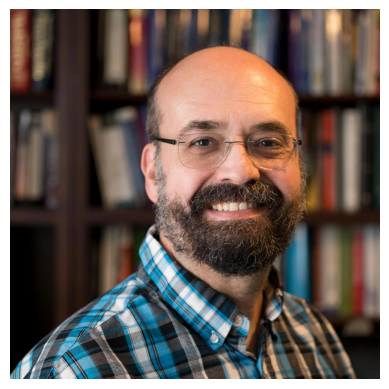

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Provide the image URL
image_url = "https://www.heatonresearch.com/images/jeff/about-jeff-heaton-2020.jpg"  # Replace with the actual image URL

# Download the image
response = requests.get(image_url)
image_array = np.array(bytearray(response.content), dtype=np.uint8)

# Decode the image using OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# display the image
display_image(image_rgb)

Analyze the image and print out key measures.

In [7]:
import cv2

all_measures = measures.all_measures()
face = facial.AnalyzeFace(measures = all_measures)
face.load_image(image_rgb,crop=True)
face.analyze()

2025-04-10 00:55:42,652 - INFO - Headpose: yaw:5.309793949127197, pitch:10.478902816772461, roll:-1.248754858970642


{'fai': 2.205742831571463,
 'oce.l': 33.63700475813939,
 'oce.r': 39.8568546311397,
 'brow.d': 0.49215370764687766,
 'dental_area': 503.8683194751793,
 'dental_left': 236.3415516057721,
 'dental_right': 267.5267678694072,
 'dental_ratio': 0.883431416930742,
 'dental_diff': 31.185216263635084,
 'eye.left': 127.28412541002035,
 'eye.right': 147.17605461896164,
 'eye.diff': 19.89,
 'eye.ratio': 0.864842624974277,
 'id': 37.9030253641686,
 'ml': 63.75100471268334,
 'nw': 36.44015195702405,
 'oe': 89.57332685215268,
 'tilt': 0.6610758115854196,
 'px2mm': 0.2422915639681908,
 'pd': 260.0173071162764}

Display the images with measures marked.

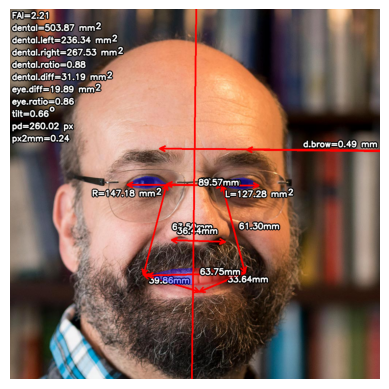

In [8]:
# Display the image
plt.imshow(face.render_img)
plt.axis('off')  # Hide axes
plt.show()

In [9]:
items = face.get_all_items()
assert 'fai' in items
assert isinstance(items, list), "Expected a list"